In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.datasets import load_iris, load_digits
from sklearn.inspection import permutation_importance
from sklearn.metrics import classification_report, roc_curve, RocCurveDisplay

# from xgboost import XGBClassifier

# Tree and Ensemble Models

## Live Demo


In [3]:
data = load_iris()

In [4]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
attrs, tgt = data.data, data.target

In [6]:
tree = DecisionTreeClassifier()

In [7]:
tree.fit(attrs, tgt)

DecisionTreeClassifier()

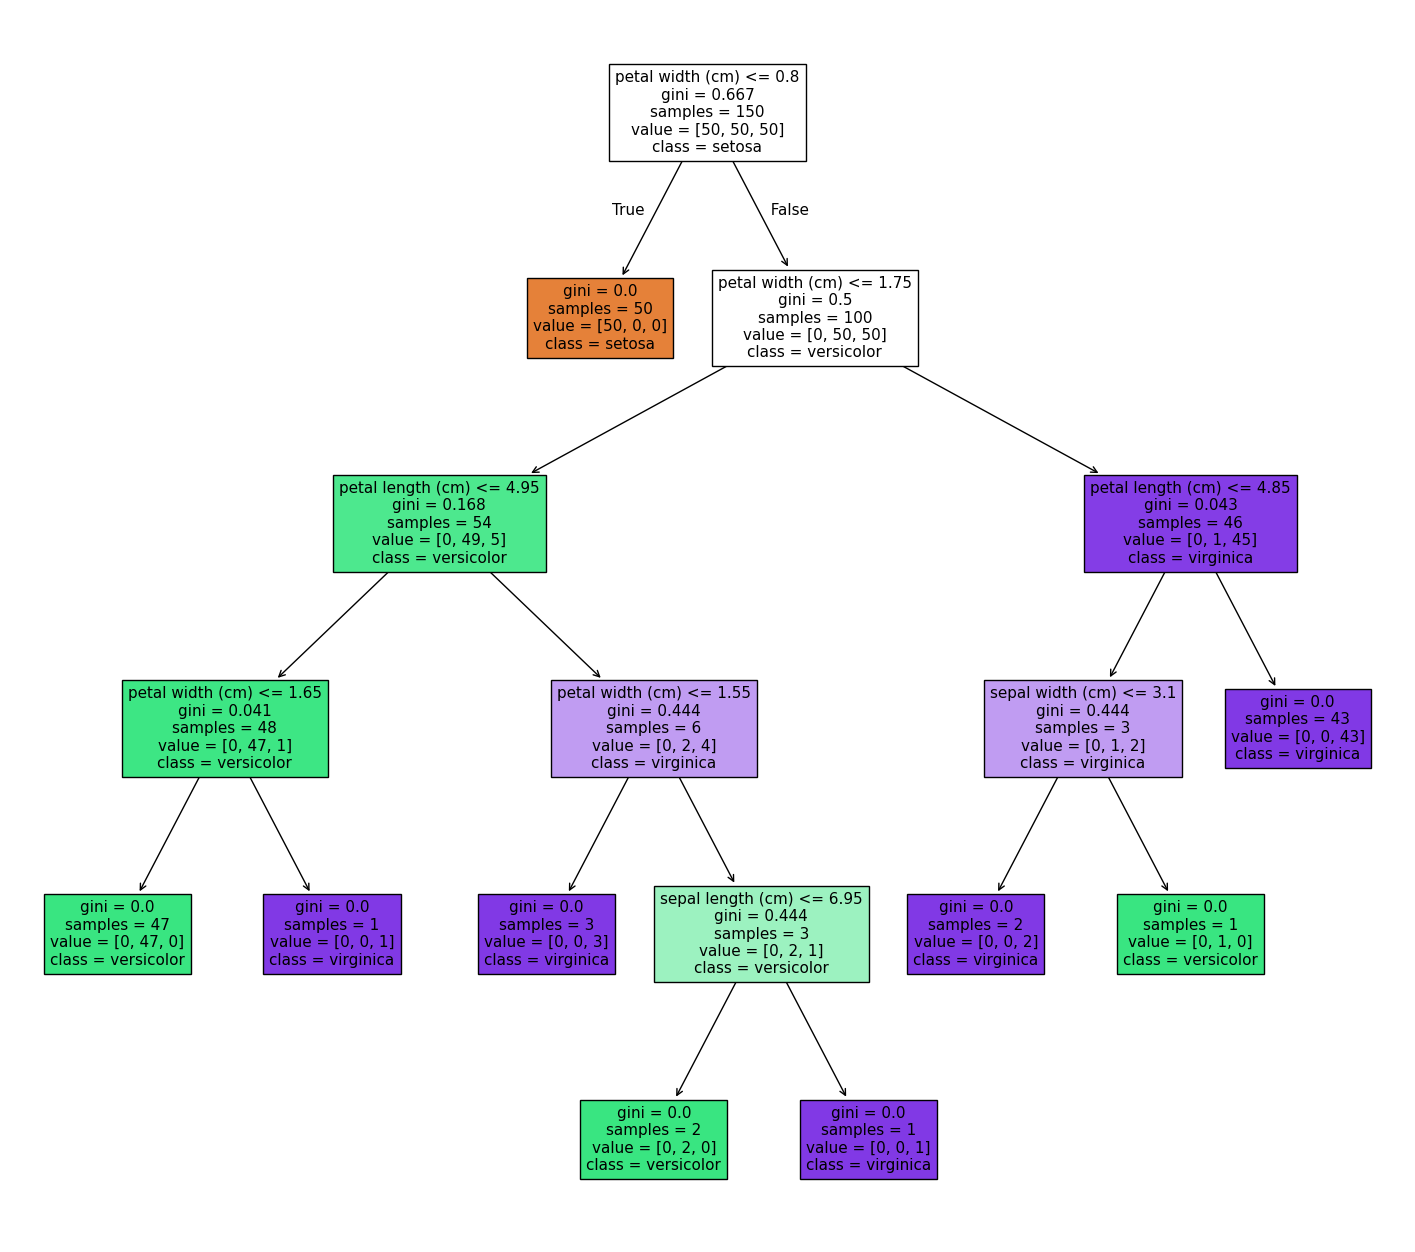

In [8]:
plt.figure(figsize=(18,16))
plot_tree(tree, feature_names=data.feature_names, class_names=data.target_names, filled=True)
plt.show()

Top cell is called **root**. *Always* left arrow is **True**, right is **False**. x[0:3] are the feature names

In [9]:
digits = load_digits()

In [10]:
digits_attrs, digit_tgt = digits.data, digits.target

In [11]:
tree = DecisionTreeClassifier()

In [12]:
tree.fit(digits_attrs, digit_tgt)

DecisionTreeClassifier()

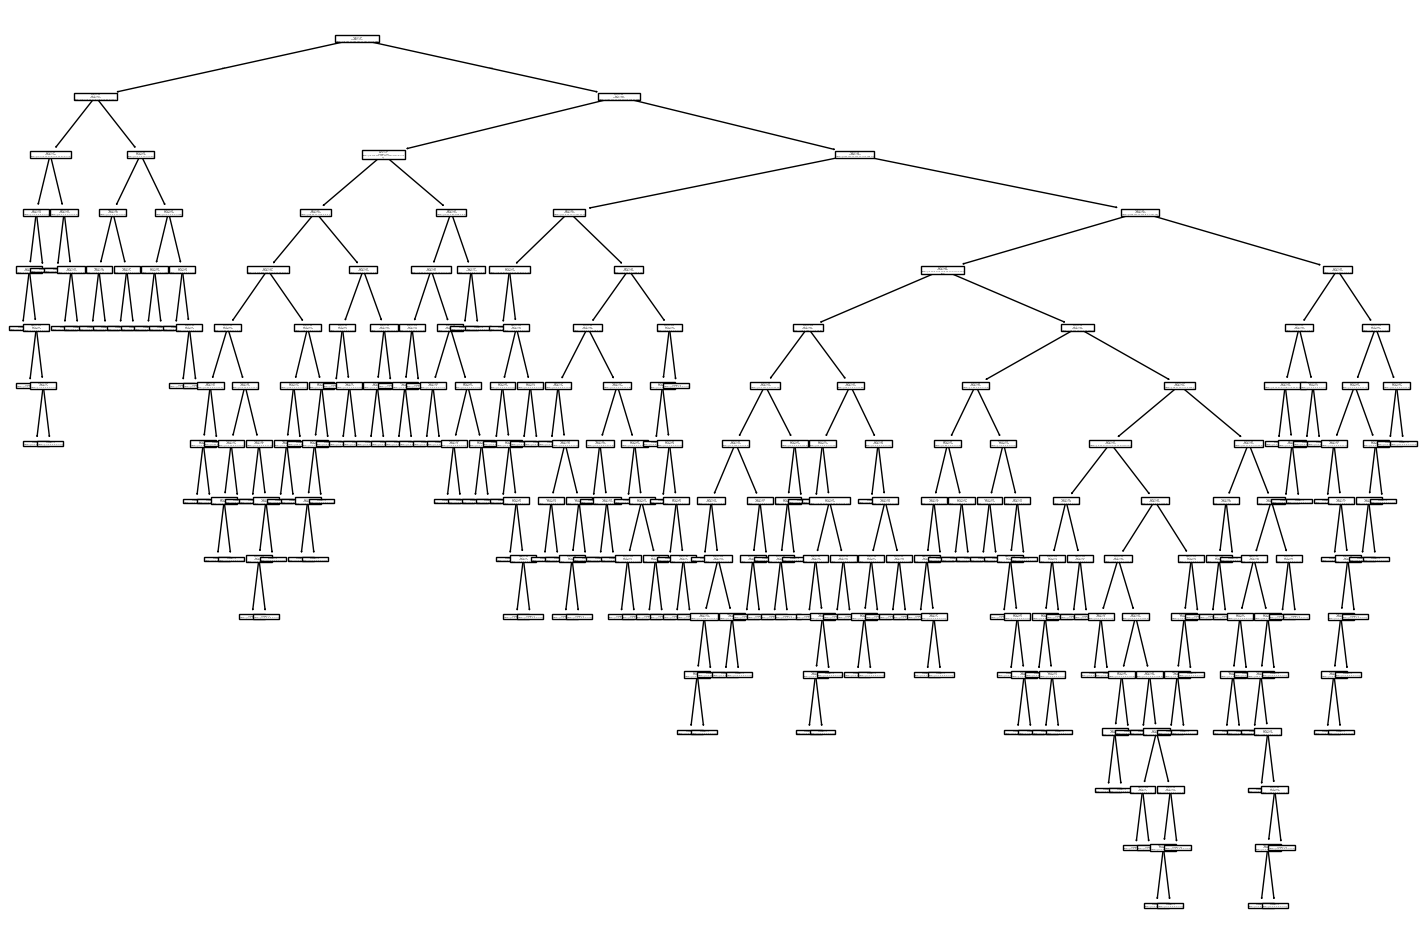

In [13]:
plt.figure(figsize=(18,12))
plot_tree(tree)
plt.show()

In [14]:
tree.get_depth()

15

### Decision forests

In [15]:
trees = [
    DecisionTreeClassifier(max_depth=5).fit(digits_attrs, digit_tgt),
    DecisionTreeClassifier(max_depth=2).fit(digits_attrs, digit_tgt),
    DecisionTreeClassifier(max_depth=10).fit(digits_attrs, digit_tgt),
    DecisionTreeClassifier(max_depth=14).fit(digits_attrs, digit_tgt),
    DecisionTreeClassifier().fit(digits_attrs, digit_tgt)
]
result = {}
for i, tree in enumerate(trees):
    result[f'tree_{i}'] = tree.predict(digits_attrs)

In [16]:
result

{'tree_0': array([0, 8, 8, ..., 8, 3, 8]),
 'tree_1': array([0, 7, 7, ..., 7, 7, 7]),
 'tree_2': array([0, 1, 2, ..., 8, 9, 8]),
 'tree_3': array([0, 1, 2, ..., 8, 9, 8]),
 'tree_4': array([0, 1, 2, ..., 8, 9, 8])}

In [17]:
pd.DataFrame(result)

,tree_0,tree_1,tree_2,tree_3,tree_4
0,0,0,0,0,0
1,8,7,1,1,1
2,8,7,2,2,2
3,2,6,3,3,3
4,4,0,4,4,4
...,...,...,...,...,...
1792,3,7,9,9,9
1793,0,0,0,0,0
1794,8,7,8,8,8
1795,3,7,9,9,9


This is not a forest. It is boarding classifier

In [18]:
forest = RandomForestClassifier()

In [19]:
forest.fit(digits_attrs, digit_tgt)

RandomForestClassifier()

In [20]:
forest.estimator_

DecisionTreeClassifier()

In [21]:
forest.feature_importances_

array([0.00000000e+00, 1.86226335e-03, 2.03478944e-02, 1.05874927e-02,
       9.46892700e-03, 2.10100819e-02, 9.28191404e-03, 7.54053315e-04,
       3.92706699e-05, 1.13913413e-02, 2.86143349e-02, 6.93106853e-03,
       1.45604388e-02, 2.59297761e-02, 4.97087122e-03, 6.85728810e-04,
       3.99359322e-05, 6.72558192e-03, 2.15337022e-02, 2.49610454e-02,
       3.25524760e-02, 4.58347750e-02, 1.02566652e-02, 3.99704841e-04,
       3.98930818e-05, 1.25634946e-02, 4.79530663e-02, 2.70713864e-02,
       2.98571958e-02, 2.16694806e-02, 2.95522035e-02, 1.95131194e-05,
       0.00000000e+00, 3.11081542e-02, 2.74814790e-02, 1.78537583e-02,
       4.27587203e-02, 2.07629284e-02, 2.72672778e-02, 0.00000000e+00,
       3.34313402e-05, 1.12372945e-02, 3.27865953e-02, 4.04413191e-02,
       1.98568169e-02, 1.83343440e-02, 2.34290937e-02, 2.55794121e-05,
       7.22414575e-05, 1.89399579e-03, 1.52551125e-02, 2.01678473e-02,
       1.30937384e-02, 2.22798458e-02, 2.79221005e-02, 2.07621801e-03,
      

In [22]:
# the method feature_importances_ should not be used
list(zip((digits.feature_names), np.round(forest.feature_importances_, 4)))

[('pixel_0_0', 0.0),
 ('pixel_0_1', 0.0019),
 ('pixel_0_2', 0.0203),
 ('pixel_0_3', 0.0106),
 ('pixel_0_4', 0.0095),
 ('pixel_0_5', 0.021),
 ('pixel_0_6', 0.0093),
 ('pixel_0_7', 0.0008),
 ('pixel_1_0', 0.0),
 ('pixel_1_1', 0.0114),
 ('pixel_1_2', 0.0286),
 ('pixel_1_3', 0.0069),
 ('pixel_1_4', 0.0146),
 ('pixel_1_5', 0.0259),
 ('pixel_1_6', 0.005),
 ('pixel_1_7', 0.0007),
 ('pixel_2_0', 0.0),
 ('pixel_2_1', 0.0067),
 ('pixel_2_2', 0.0215),
 ('pixel_2_3', 0.025),
 ('pixel_2_4', 0.0326),
 ('pixel_2_5', 0.0458),
 ('pixel_2_6', 0.0103),
 ('pixel_2_7', 0.0004),
 ('pixel_3_0', 0.0),
 ('pixel_3_1', 0.0126),
 ('pixel_3_2', 0.048),
 ('pixel_3_3', 0.0271),
 ('pixel_3_4', 0.0299),
 ('pixel_3_5', 0.0217),
 ('pixel_3_6', 0.0296),
 ('pixel_3_7', 0.0),
 ('pixel_4_0', 0.0),
 ('pixel_4_1', 0.0311),
 ('pixel_4_2', 0.0275),
 ('pixel_4_3', 0.0179),
 ('pixel_4_4', 0.0428),
 ('pixel_4_5', 0.0208),
 ('pixel_4_6', 0.0273),
 ('pixel_4_7', 0.0),
 ('pixel_5_0', 0.0),
 ('pixel_5_1', 0.0112),
 ('pixel_5_2', 0.032

In [23]:
# using permutation importance for feature importance
permutation_importance(forest, digits_attrs, digit_tgt)

{'importances_mean': array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00055648, 0.        , 0.        , 0.        ,
        0.        , 0.00189204, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.0001113 , 0.00155815, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.0001113 , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ]),
 'importances_std': array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ,

In [24]:
list(zip((digits.feature_names), np.round(permutation_importance(forest, digits_attrs, digit_tgt)['importances_mean'], 4)))

[('pixel_0_0', 0.0),
 ('pixel_0_1', 0.0),
 ('pixel_0_2', 0.0),
 ('pixel_0_3', 0.0),
 ('pixel_0_4', 0.0),
 ('pixel_0_5', 0.0),
 ('pixel_0_6', 0.0),
 ('pixel_0_7', 0.0),
 ('pixel_1_0', 0.0),
 ('pixel_1_1', 0.0),
 ('pixel_1_2', 0.0),
 ('pixel_1_3', 0.0),
 ('pixel_1_4', 0.0),
 ('pixel_1_5', 0.0),
 ('pixel_1_6', 0.0),
 ('pixel_1_7', 0.0),
 ('pixel_2_0', 0.0),
 ('pixel_2_1', 0.0),
 ('pixel_2_2', 0.0),
 ('pixel_2_3', 0.0),
 ('pixel_2_4', 0.0),
 ('pixel_2_5', 0.0007),
 ('pixel_2_6', 0.0),
 ('pixel_2_7', 0.0),
 ('pixel_3_0', 0.0),
 ('pixel_3_1', 0.0),
 ('pixel_3_2', 0.0017),
 ('pixel_3_3', 0.0),
 ('pixel_3_4', 0.0),
 ('pixel_3_5', 0.0),
 ('pixel_3_6', 0.0),
 ('pixel_3_7', 0.0),
 ('pixel_4_0', 0.0),
 ('pixel_4_1', 0.0),
 ('pixel_4_2', 0.0),
 ('pixel_4_3', 0.0),
 ('pixel_4_4', 0.0),
 ('pixel_4_5', 0.0),
 ('pixel_4_6', 0.0),
 ('pixel_4_7', 0.0),
 ('pixel_5_0', 0.0),
 ('pixel_5_1', 0.0),
 ('pixel_5_2', 0.0003),
 ('pixel_5_3', 0.0013),
 ('pixel_5_4', 0.0),
 ('pixel_5_5', 0.0),
 ('pixel_5_6', 0.0),
 

In [25]:
random_seed = 42

In [26]:
num_samples = 100

In [27]:
# average weight of a man in pounds is 172 with a std dev of 29
weight = np.random.normal(loc=172, scale=29, size=num_samples)

In [28]:
weight.sort()

In [29]:
df = pd.DataFrame(weight)

In [30]:
df.columns = ['weight']

In [31]:
np.random.randn()

-1.7353871658993305

In [33]:
df['obese'] = pd.Series()

In [34]:
# for i in range(num_samples):
#     if df.weight.rank()[i] / 100 < np.random.rand():
#         df.loc[i, 'obese'] = 0
#     else:
#         df.loc[i, 'obese'] = 1

df['obese'] = np.where(df['weight'].rank() / 100 < np.random.rand(num_samples), 0, 1)

In [35]:
df.obese.value_counts()

obese
1    54
0    46
Name: count, dtype: int64

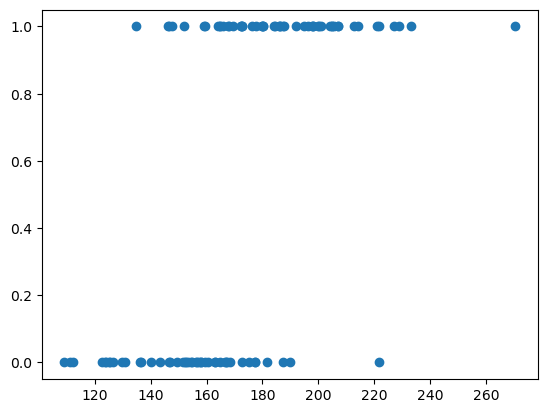

In [36]:
plt.scatter(df.weight, df.obese)
plt.show()

In [37]:
attrs = np.array(df.weight)
attrs = attrs.reshape(100, 1)
tgt = np.array(df.obese).astype(int)

In [38]:
tgt.shape

(100,)

In [39]:
attrs.shape

(100, 1)

In [40]:
classification = LogisticRegression()
classification.fit(attrs, tgt)

LogisticRegression()

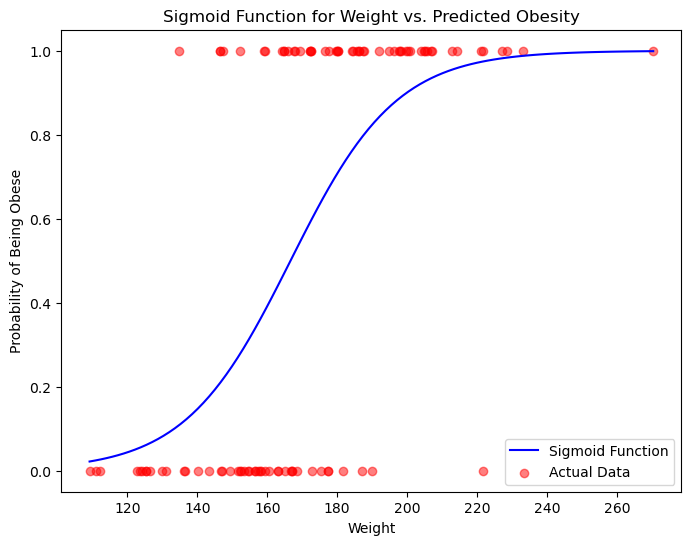

In [41]:
# Assuming the logistic regression model is already fitted
# Extract the coefficient and intercept
coef = classification.coef_[0][0]  # The coefficient for 'weight'
intercept = classification.intercept_[0]  # The intercept term

# Create a range of weight values (using min and max from the dataset)
weight_range = np.linspace(df['weight'].min(), df['weight'].max(), 100)

# Calculate the linear combination (z = intercept + coef * weight)
z = intercept + coef * weight_range

# Calculate the sigmoid function
sigmoid = 1 / (1 + np.exp(-z))

# Plot the actual weights vs. predicted probabilities (sigmoid values)
plt.figure(figsize=(8, 6))
plt.plot(weight_range, sigmoid, label='Sigmoid Function', color='blue')

# Scatter plot of the actual data points for obese (0 or 1) vs weight
plt.scatter(df['weight'], df['obese'], color='red', label='Actual Data', alpha=0.5)

# Adding labels and title
plt.xlabel('Weight')
plt.ylabel('Probability of Being Obese')
plt.title('Sigmoid Function for Weight vs. Predicted Obesity')
plt.legend()
plt.show()

In [42]:
y_true = tgt
y_pred = classification.predict(attrs)

In [43]:
roc = roc_curve(y_true, y_pred, pos_label=1)

In [44]:
fpr, tpr, thresholds = roc_curve(y_true, y_pred, pos_label=1)

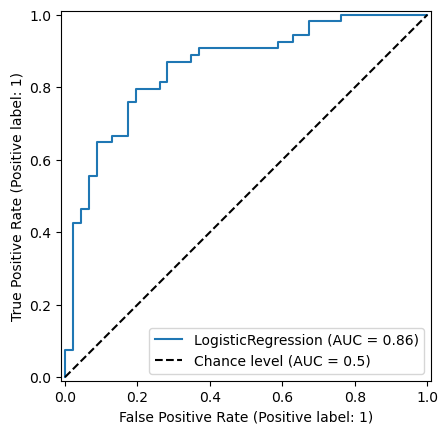

In [45]:
RocCurveDisplay.from_estimator(classification, attrs, tgt, plot_chance_level=True)
plt.show()

In [46]:
tree = RandomForestClassifier(max_depth=3)

In [47]:
tree.fit(attrs, tgt)

RandomForestClassifier(max_depth=3)

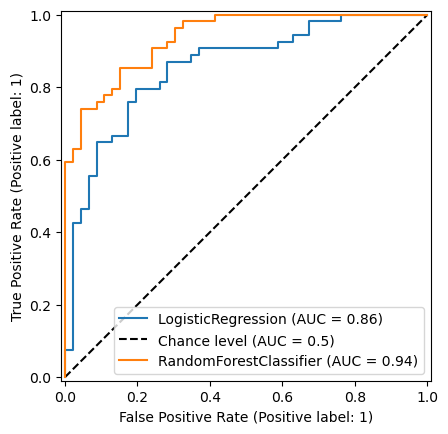

In [48]:
roc_display_log_reg  = RocCurveDisplay.from_estimator(classification, attrs, tgt, plot_chance_level=True)
roc_display_rf = RocCurveDisplay.from_estimator(tree, attrs, tgt, ax=roc_display_log_reg.ax_)

plt.show()

In [49]:
y_true

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1])

In [50]:
y_pred_tree = tree.predict_proba(attrs)[:, 1]

In [51]:
y_pred_tree

array([0.03711135, 0.03711135, 0.03711135, 0.03711135, 0.03711135,
       0.03711135, 0.03711135, 0.03711135, 0.03711135, 0.03711135,
       0.06742174, 0.32417959, 0.20052048, 0.20052048, 0.21052048,
       0.21052048, 0.44933433, 0.44933433, 0.35924814, 0.31298042,
       0.34532752, 0.2471534 , 0.24192695, 0.27904099, 0.14921496,
       0.14921496, 0.1309429 , 0.1309429 , 0.1309429 , 0.1309429 ,
       0.1309429 , 0.1309429 , 0.1309429 , 0.1309429 , 0.37274681,
       0.34424681, 0.35424681, 0.29078763, 0.28627381, 0.28627381,
       0.52377218, 0.52377218, 0.52377218, 0.47168313, 0.46768313,
       0.4450569 , 0.4450569 , 0.47288295, 0.58227135, 0.63212072,
       0.6467057 , 0.68713827, 0.70013827, 0.70013827, 0.67581078,
       0.67581078, 0.55572497, 0.53382799, 0.54338354, 0.49739714,
       0.49739714, 0.69997054, 0.78969576, 0.78969576, 0.78969576,
       0.78969576, 0.74394251, 0.82886407, 0.82886407, 0.82886407,
       0.81394343, 0.81394343, 0.64409325, 0.73097942, 0.74240

In [52]:
roc_curve(y_true, y_pred_tree, pos_label=1)

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.02173913, 0.02173913,
        0.04347826, 0.04347826, 0.04347826, 0.04347826, 0.08695652,
        0.08695652, 0.10869565, 0.10869565, 0.13043478, 0.13043478,
        0.15217391, 0.15217391, 0.19565217, 0.23913043, 0.23913043,
        0.23913043, 0.2826087 , 0.2826087 , 0.30434783, 0.30434783,
        0.32608696, 0.32608696, 0.36956522, 0.41304348, 0.41304348,
        0.45652174, 0.58695652, 0.76086957, 0.7826087 , 1.        ]),
 array([0.        , 0.2962963 , 0.37037037, 0.40740741, 0.46296296,
        0.5       , 0.51851852, 0.59259259, 0.59259259, 0.62962963,
        0.62962963, 0.66666667, 0.7037037 , 0.74074074, 0.74074074,
        0.75925926, 0.75925926, 0.77777778, 0.77777778, 0.7962963 ,
        0.7962963 , 0.85185185, 0.85185185, 0.85185185, 0.87037037,
        0.90740741, 0.90740741, 0.92592593, 0.92592593, 0.96296296,
        0.96296296, 0.98148148, 0.98148148, 0.

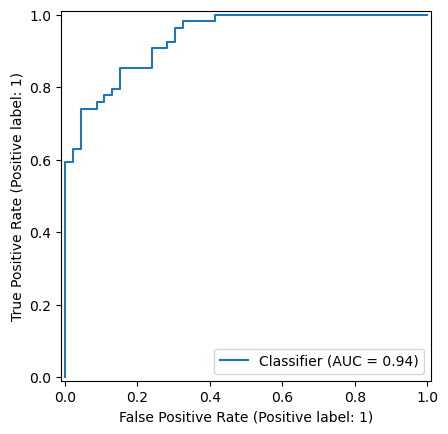

In [53]:
RocCurveDisplay.from_predictions(y_true, y_pred_tree)

In [54]:
np.log(1/6)

-1.791759469228055

###### 

In [57]:
np.log(6)

1.791759469228055